# Example Model Word2Vec

In [ ]:
# install dependencies
!python -m pip install --upgrade pip
!pip install gensim nltk beautifulsoup4 lxml

In [1]:
import re
import nltk
import bs4 as bs
import numpy as np
import urllib.request
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from gensim.models import word2vec

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
nltk_lists = ['tokenizers/punkt', 'stemmers/rslp', 'corpora/stopwords']

In [ ]:
for name in nltk_lists:
    try:
        nltk.data.find(name)
    except LookupError:
        nltk.download(name.split('/')[1])

In [2]:
scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scrapped_data.read()

In [3]:
article

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Artificial intelligence - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-featu

In [4]:
parsed_article = bs.BeautifulSoup(article, 'lxml')

In [5]:
# Since wikipedia stores the textual data we need in `p` tags, 
# we extract the data using find_all('p')
paragraphs = parsed_article.find_all('p')

In [ ]:
paragraphs

In [6]:
# append the paragraphs in article_text
article_text = ""
for p in paragraphs:
    article_text += p.text

In [7]:
# Convert the data to uniform case
processed_article = article_text.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_article)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [ ]:
data = "Word2Vec is an algorithm used for learning vector representations of words in a continuous vector space."

In [8]:
model = word2vec.Word2Vec(all_words, min_count=2, workers=4)

In [25]:
words = list(model.wv.vectors)
model.wv.index_to_key

['ai',
 'learning',
 'intelligence',
 'machine',
 'used',
 'human',
 'artificial',
 'problems',
 'knowledge',
 'many',
 'use',
 'networks',
 'may',
 'research',
 'problem',
 'neural',
 'search',
 'data',
 'researchers',
 'reasoning',
 'also',
 'decision',
 'including',
 'deep',
 'field',
 'solve',
 'make',
 'machines',
 'applications',
 'general',
 'program',
 'agent',
 'computer',
 'possible',
 'example',
 'could',
 'technology',
 'information',
 'mind',
 'risk',
 'would',
 'however',
 'programs',
 'people',
 'several',
 'large',
 'system',
 'algorithms',
 'world',
 'specific',
 'using',
 'logic',
 'based',
 'like',
 'symbolic',
 'two',
 'goals',
 'theory',
 'input',
 'e',
 'systems',
 'humans',
 'intelligent',
 'developed',
 'uses',
 'google',
 'recognition',
 'models',
 'future',
 'ability',
 'action',
 'called',
 'one',
 'goal',
 'generative',
 'solutions',
 'processing',
 'important',
 'others',
 'began',
 'early',
 'well',
 'widely',
 'way',
 'even',
 'difficult',
 'work',
 'deci

In [12]:
def tsne_plot():
    labels = []
    tokens = []
    
    # Extracting words and their vectors from our trained model 
    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    # Train t-SNE 
    tsne_model = TSNE(perplexity=45, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.xlabel("dimension 1")
        plt.ylabel("dimension 2")
    plt.show()

c:\Users\rober\Documents\aprendizado_maquina\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\Users\rober\Documents\aprendizado_maquina\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


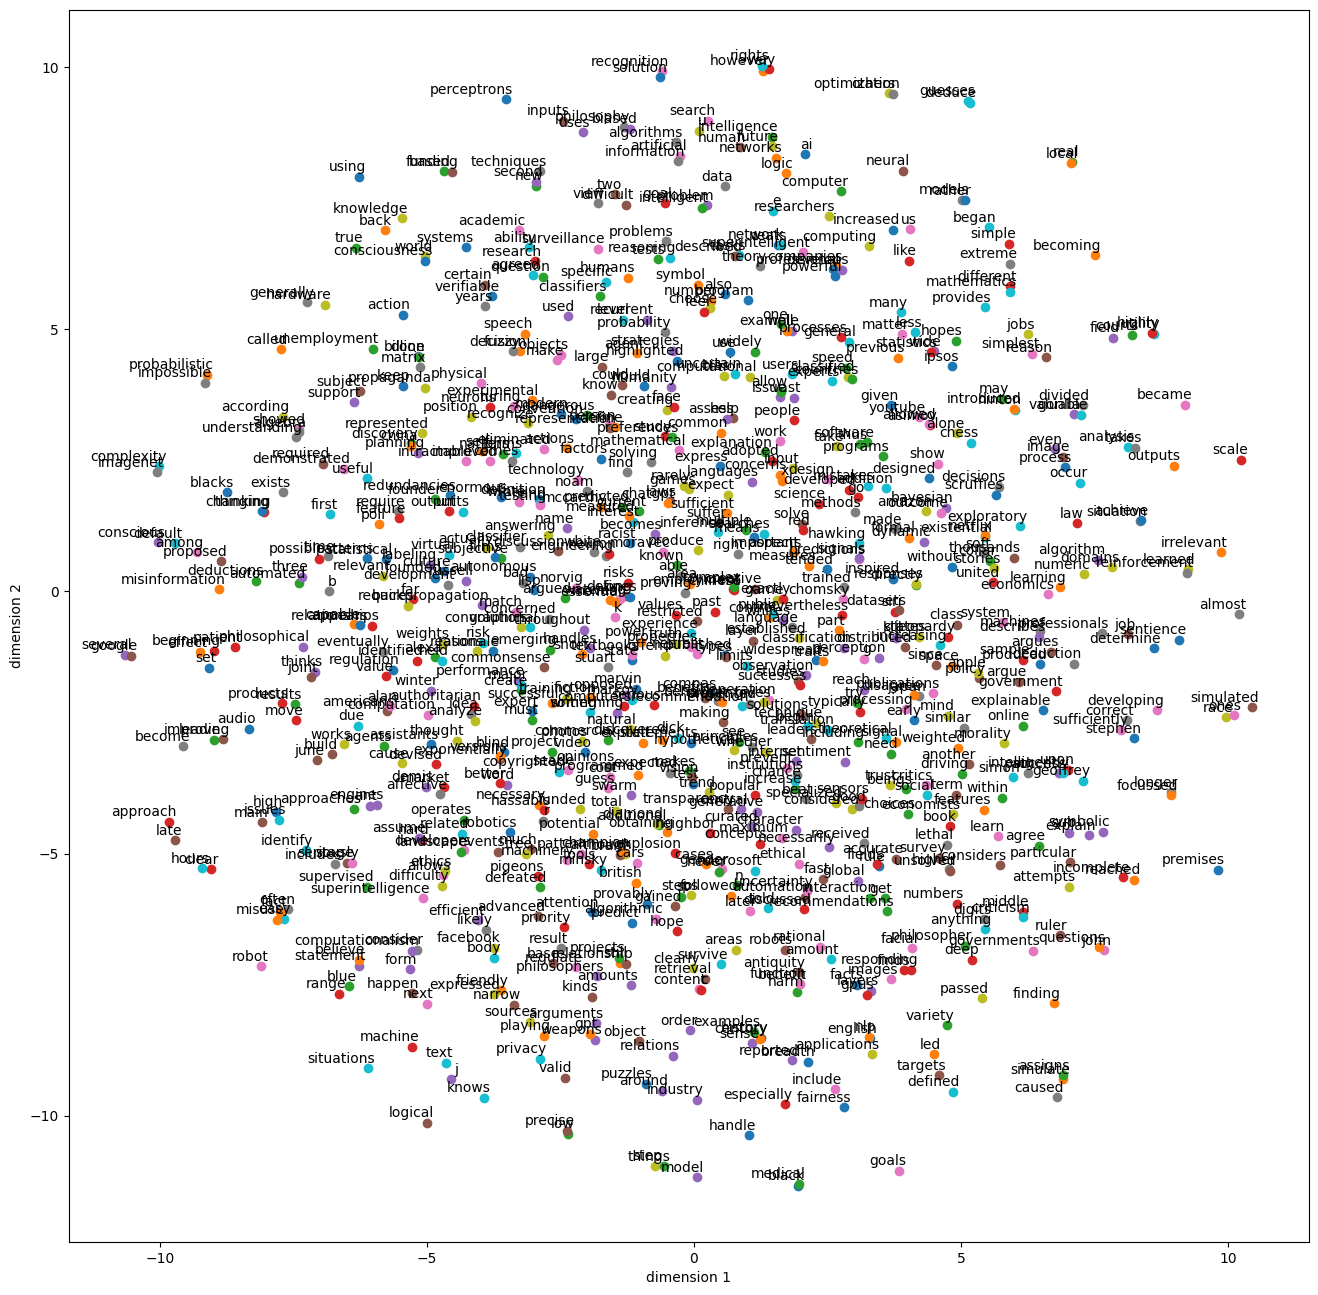

In [13]:
tsne_plot()

c:\Users\rober\Documents\aprendizado_maquina\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\Users\rober\Documents\aprendizado_maquina\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


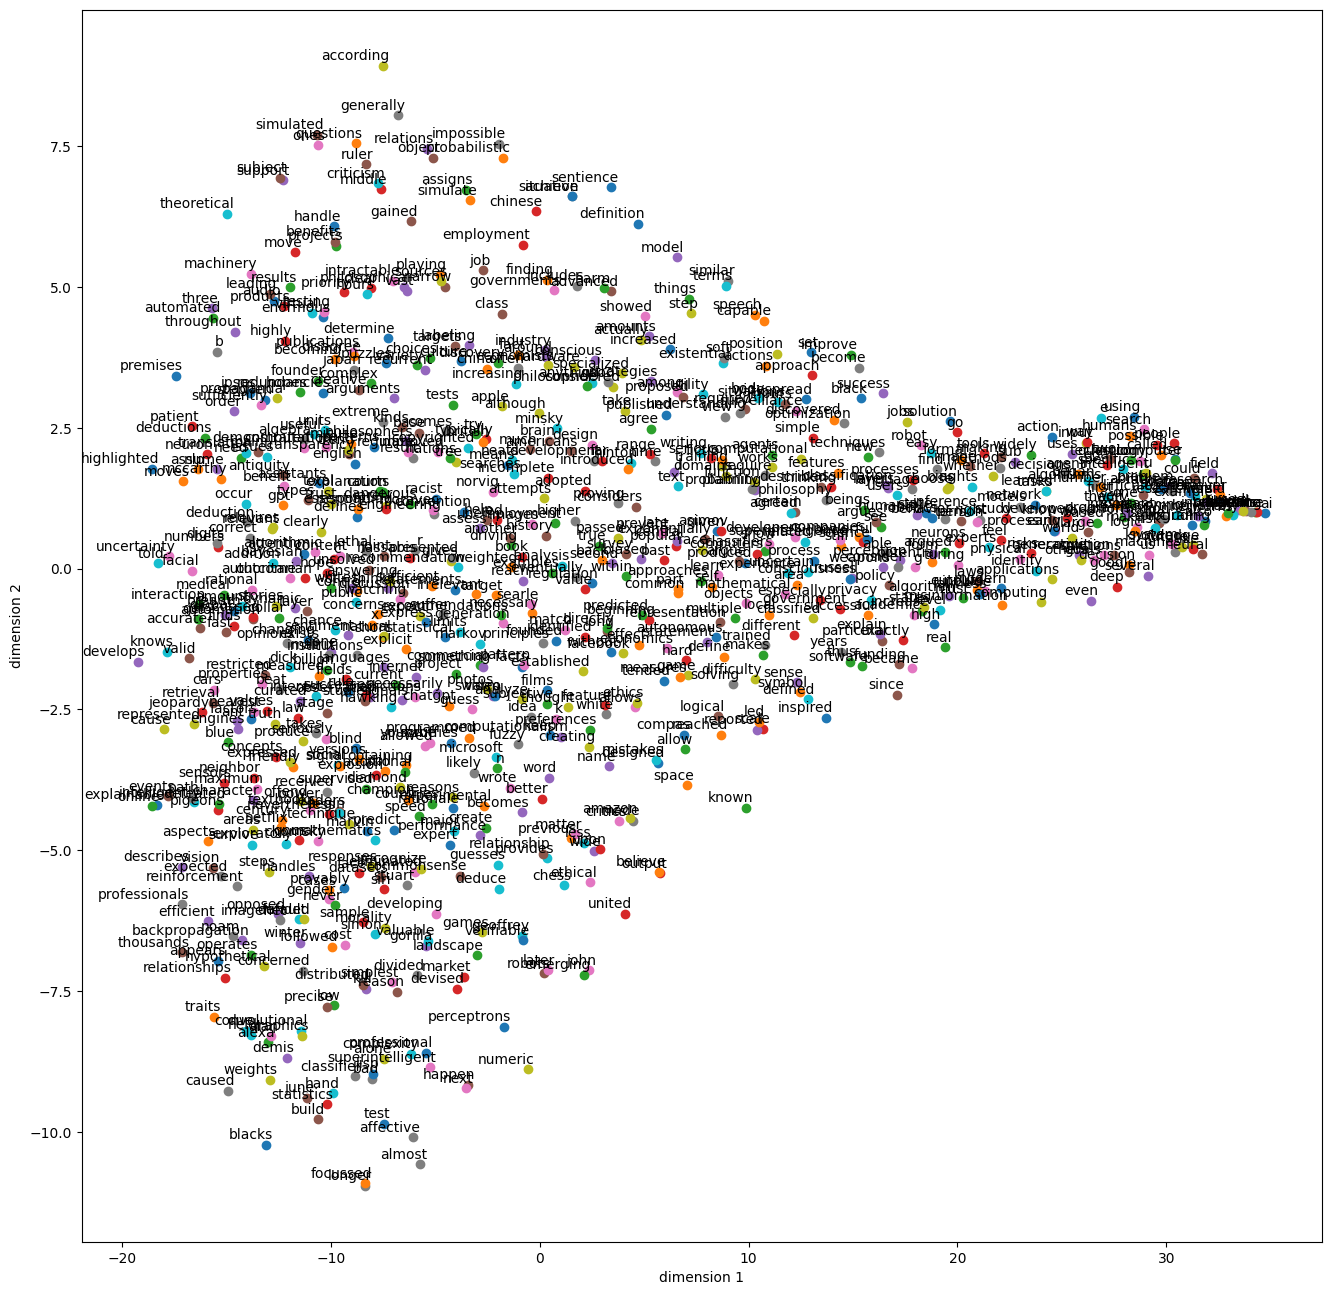

In [14]:
# Words that occur atleast 2 times
model = word2vec.Word2Vec(all_words, window=20, min_count=2, workers=4)
tsne_plot()

In [19]:
# demo output
model.wv.most_similar('intelligence')

[('ai', 0.9839172959327698),
 ('machine', 0.9791387319564819),
 ('artificial', 0.9791054129600525),
 ('learning', 0.9782065749168396),
 ('used', 0.9774624705314636),
 ('problems', 0.9769166707992554),
 ('networks', 0.9768691062927246),
 ('however', 0.9755659103393555),
 ('mind', 0.9750487208366394),
 ('also', 0.9744179844856262)]

In [20]:
keys = ['intelligence', 'ai']

# this array will contain the vectors(dimension 100) and the labels
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [21]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=50, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

c:\Users\rober\Documents\aprendizado_maquina\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\Users\rober\Documents\aprendizado_maquina\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


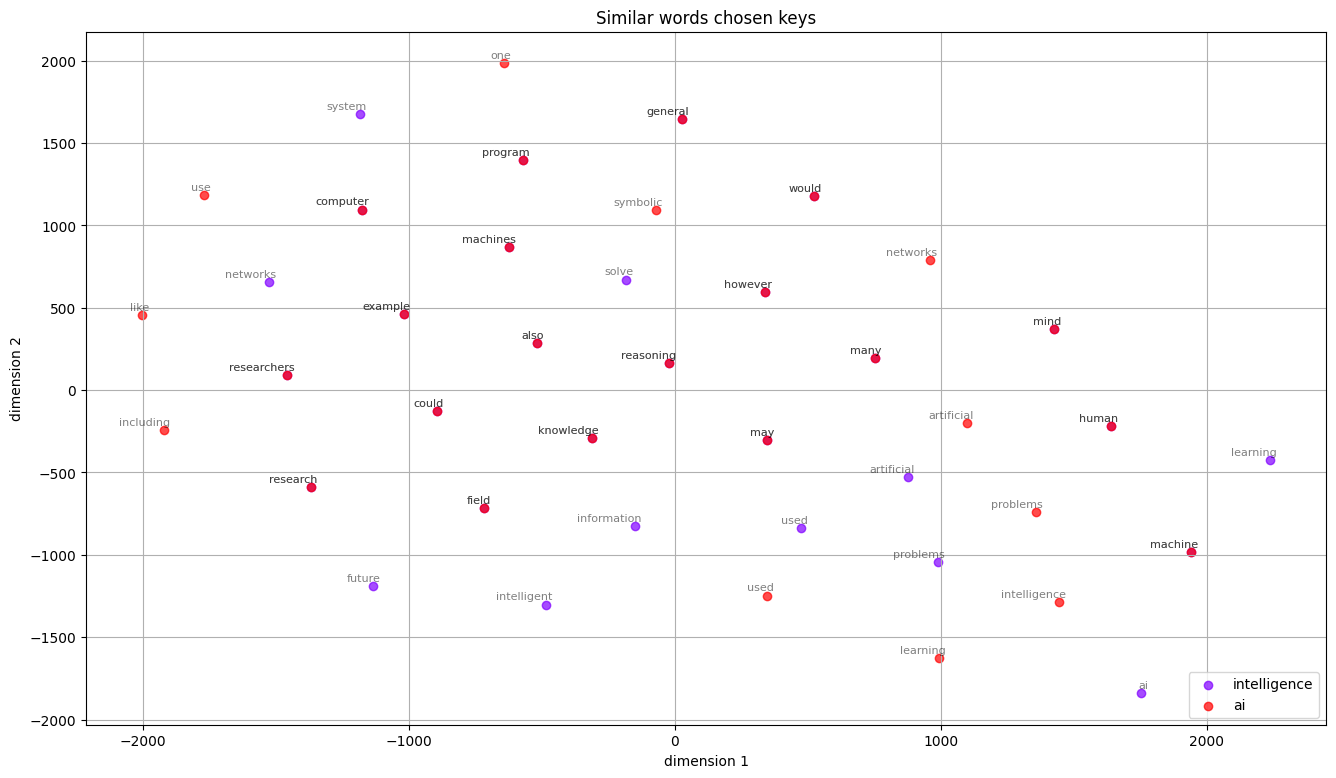

In [22]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words chosen keys', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [23]:
import gensim.downloader as api
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [24]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded
